In [45]:
import monai
from mgmt.config import get_cfg
from mgmt.data.pickle import load_subject_pickles
from mgmt.visualize.subject import plot_subject_with_label, plot_volume
import torchio as tio
import torch

In [3]:
cfg = get_cfg()

In [8]:
model_args = dict(cfg.MODEL.ResNet)
model_args["n_input_channels"] = 1

In [29]:
subjects = load_subject_pickles(
    "/home/bryan/expr/brain_tumor/preprocess-subjects/resample-1.8-crop-64-t1c",
    "P-00404.pkl"
)

loading subjects from pickles: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 653/653 [00:00<00:00, 26497.43it/s]


In [30]:
subject = subjects[0]

In [32]:
subject.t1c

ScalarImage(shape: (1, 78, 100, 80); spacing: (1.80, 1.80, 1.80); orientation: RAS+; dtype: torch.FloatTensor; memory: 2.4 MiB)

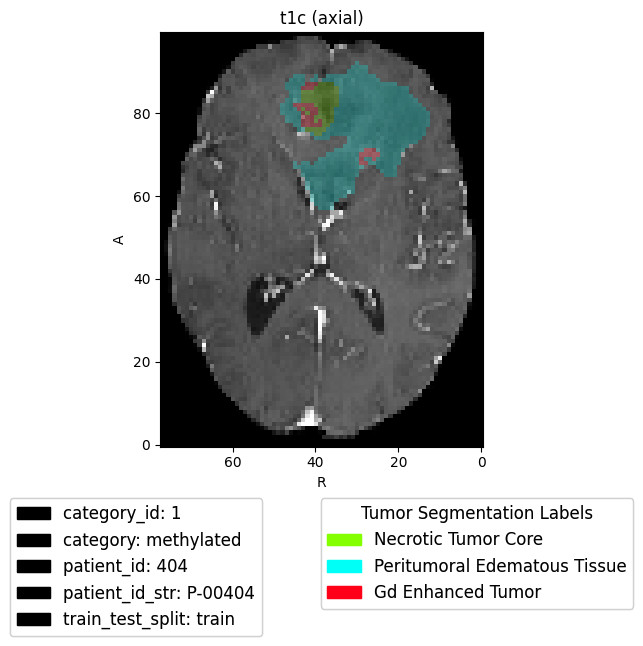

In [33]:
plot_subject_with_label(subject, show=True, add_metadata=True, add_tumor_legend=True, single_axis="axial", subject_include=["t1c"]);

In [34]:
sampler = tio.data.WeightedSampler(patch_size=[64, 64, 64], probability_map = "patch_sampling_probability_map")

In [35]:
generator = sampler(subject)

In [38]:
patch = next(generator)

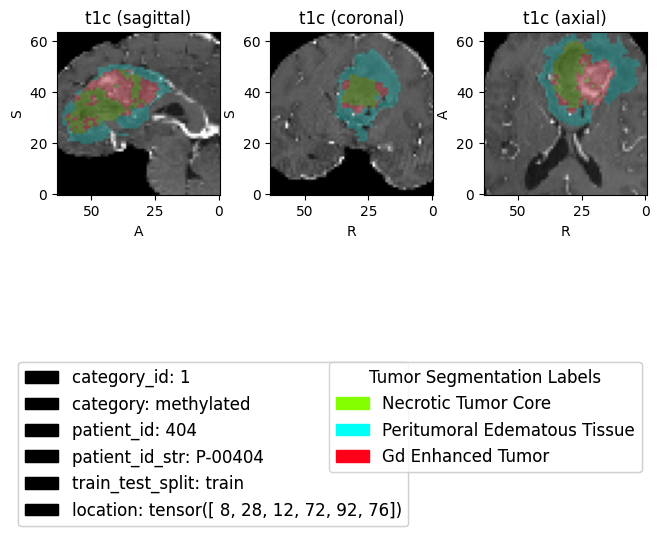

In [37]:
plot_subject_with_label(patch, show=True, add_metadata=True, add_tumor_legend=True); #single_axis="axial", subject_include=["t1c"]);

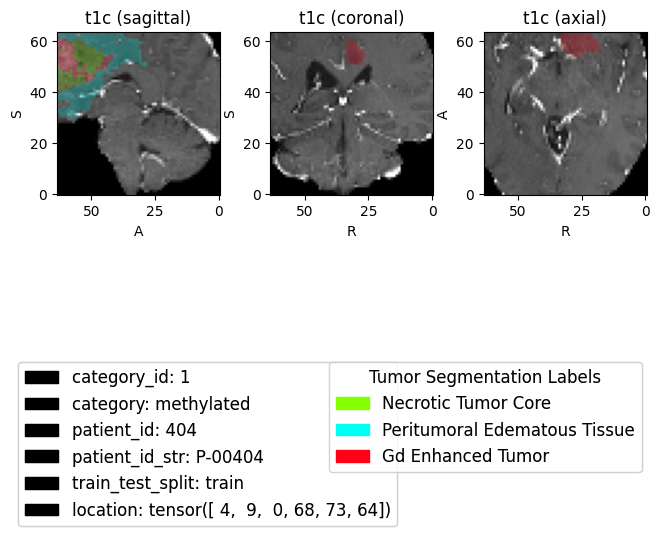

In [39]:
plot_subject_with_label(patch, show=True, add_metadata=True, add_tumor_legend=True); #single_axis="axial", subject_include=["t1c"]);

In [52]:
model = monai.networks.nets.resnet.ResNet(**model_args).eval().to("cuda")

In [51]:
tensor_input = torch.unsqueeze(patch.t1c.tensor, 0).to("cuda")

In [53]:
model

ResNet(
  (conv1): Conv3d(1, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
  (bn1): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool3d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResNetBlock(
      (conv1): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
      (bn1): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
      (bn2): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (layer2): Sequential(
    (0): ResNetBlock(
      (conv1): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
      (bn1): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=T

In [59]:
out = model.conv1(tensor_input)
out = model.bn1(out)
out = model.relu(out)
maxpool = model.maxpool(out)

In [63]:
layer1 = model.layer1(maxpool)

In [64]:
layer1.shape

torch.Size([1, 16, 32, 32, 32])

In [65]:
491*5

2455